**Data Cleaning**



In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_excel("air_quality.xlsx") # We converted excel document to pandas dataframe

In [ ]:
df.head()

,Date,Time,CO.GT.,PT08.S1.CO.,NMHC.GT.,C6H6.GT.,PT08.S2.NMHC.,NOx.GT.,PT08.S3.NOx.,NO2.GT.,PT08.S4.NO2.,PT08.S5.O3.,T,RH,AH,active_factory,co_gt_unit
0,2022-12-26,00.00.00,1.2,NaN,31.0,"3,6",690.0,62.0,1462.0,NaN,1333.0,733.0,"11,3","56,8","0,7603",yes,m3
1,2022-12-26,01.00.00,1000000.0,1136.0,31.0,"3,3",NaN,62.0,1453.0,76.0,1333.0,730.0,"10,7","60,0","0,7702",yes,cm3
2,2022-12-26,02.00.00,900000.0,1094.0,24.0,"2,3",609.0,45.0,1579.0,60.0,1276.0,620.0,"10,7","59,7",NaN,yes,cm3
3,2022-12-26,NaN,0.6,1010.0,19.0,"1,7",NaN,-200.0,1705.0,NaN,1235.0,NaN,"10,3","60,2","0,7517",yes,m3
4,2022-12-26,04.00.00,-200.0,1011.0,14.0,"1,3",527.0,21.0,1818.0,34.0,1197.0,445.0,"10,1","60,5","0,7465",NaN,m3


In [ ]:
df.isnull().sum() # we applied this to know how many null values each column has.

Date              20
Time              23
CO.GT.            23
PT08.S1.CO.       11
NMHC.GT.          17
C6H6.GT.          17
PT08.S2.NMHC.     16
NOx.GT.           17
PT08.S3.NOx.      21
NO2.GT.           21
PT08.S4.NO2.      20
PT08.S5.O3.       19
T                 15
RH                12
AH                21
active_factory    17
co_gt_unit        16
dtype: int64

In [ ]:
df["active_factory"].value_counts() # we write this to see active_factory column's values

no      64
yes     32
 yES     7
Name: active_factory, dtype: int64

In [ ]:
df["active_factory"].loc[df["active_factory"]==" yES"]="yes" # we replaced yES with yes

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
print(df["active_factory"].mode()) #we filled null values of active_factory with its mode beacuse it is categorical.
df["active_factory"].fillna("no",inplace=True)

0    no
dtype: object


In [ ]:
df["co_gt_unit"].value_counts()

m3     75
cm3    13
M3     10
cM3     6
Name: co_gt_unit, dtype: int64

In [ ]:
df["co_gt_unit"].loc[df["co_gt_unit"]==" cm3"]="m3" #we made m3 all values of co_gt_unit because we will use m3
df["co_gt_unit"].loc[df["co_gt_unit"]==" M3"]="m3"
df["co_gt_unit"].loc[df["co_gt_unit"]==" cM3"]="m3"

In [ ]:
df["CO.GT."].value_counts()

2.2    32
2.9     6
2.8     6
4.2     5
1.0     5
2.0     4
1.4     4
1.2     3
1.8     3
3.2     3
1.9     3
2.7     3
1.6     3
1.5     3
0.9     2
6.1     2
2.5     2
0.8     2
4.4     2
1.7     2
2.1     2
0.6     2
2.4     2
3.7     2
5.5     1
4.6     1
4.8     1
8.1     1
5.8     1
3.0     1
8.0     1
2.3     1
3.5     1
3.1     1
3.6     1
0.7     1
6.9     1
6.6     1
1.1     1
3.9     1
6.5     1
Name: CO.GT., dtype: int64

In [ ]:
df["CO.GT."].loc[df['CO.GT.']>20]=df["CO.GT."].loc[df['CO.GT.']>20]/1000000 # we converted the unit from cm3 to m3


In [ ]:
df.describe()

,CO.GT.,PT08.S1.CO.,NMHC.GT.,PT08.S2.NMHC.,NOx.GT.,PT08.S3.NOx.,NO2.GT.,PT08.S4.NO2.,PT08.S5.O3.
count,97.000000,109.000000,103.000000,104.000000,103.000000,99.000000,99.000000,100.000000,101.000000
mean,-5.619588,1336.743119,150.456311,987.480769,155.223301,1047.757576,96.595960,1658.100000,1160.752475
std,40.554399,255.565111,141.409555,273.163132,122.726296,304.290815,76.163347,326.388611,386.848405
min,-200.000000,831.000000,-200.000000,501.000000,-200.000000,537.000000,-200.000000,1134.000000,384.000000
25%,1.500000,1147.000000,50.000000,782.750000,103.500000,863.000000,83.500000,1442.000000,929.000000
50%,2.200000,1318.000000,114.000000,967.000000,153.000000,976.000000,112.000000,1606.500000,1104.000000
75%,3.200000,1478.000000,209.000000,1141.500000,227.500000,1159.000000,134.500000,1778.500000,1410.000000
max,8.100000,2040.000000,685.000000,1754.000000,478.000000,1918.000000,187.000000,2679.000000,2184.000000


In [ ]:
df["T"].dtype
df["RH"].dtype
df["AH"].dtype
df["C6H6.GT."].dtype


dtype('O')

In [ ]:
df['T'].replace(',','.',regex=True,inplace=True) #we replaced commas with dot because these values must be float
df['AH'].replace(',','.',regex=True,inplace=True)
df['RH'].replace(',','.',regex=True,inplace=True)
df['C6H6.GT.'].replace(',','.',regex=True,inplace=True)

In [ ]:
df["T"] = pd.to_numeric(df["T"]) # we did this because these values must be float
df["AH"] = pd.to_numeric(df["AH"])
df["RH"] = pd.to_numeric(df["RH"])
df["C6H6.GT."] = pd.to_numeric(df["C6H6.GT."])

In [ ]:
df["CO.GT."].loc[df["CO.GT."]==-200]=df["CO.GT."].median()  #-200 is a null value. We replaced -200 with median because these columns have outlier.
df["NMHC.GT."].loc[df["NMHC.GT."]==-200]=df["NMHC.GT."].median()
df["NOx.GT."].loc[df["NOx.GT."]==-200]=df["NOx.GT."].median()
df["NO2.GT."].loc[df["NO2.GT."]==-200]=df["NO2.GT."].median()

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

In [ ]:
df.fillna(df.agg("median"),inplace=True) #we filled all null values of numeric variables because these variables have outlier and their distributiona are skewed.

/usr/local/lib/python3.8/dist-packages/pandas/core/apply.py:577: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return f(*args, **kwargs)


In [ ]:
df["co_gt_unit"].fillna("m3",inplace=True) # we filled null values with m3

In [ ]:
df.isnull().sum()

Date              0
Time              0
CO.GT.            0
PT08.S1.CO.       0
NMHC.GT.          0
C6H6.GT.          0
PT08.S2.NMHC.     0
NOx.GT.           0
PT08.S3.NOx.      0
NO2.GT.           0
PT08.S4.NO2.      0
PT08.S5.O3.       0
T                 0
RH                0
AH                0
active_factory    0
co_gt_unit        0
dtype: int64

In [ ]:
df["Date"].value_counts()

2022-12-26    24
2022-12-27    24
2022-12-28    24
2022-12-29    24
2022-12-30    24
Name: Date, dtype: int64

In [ ]:
df[~df["Date"].notnull()].index # we write this see the indexes of null values of Date

Int64Index([], dtype='int64')

In [ ]:
df["Date"].iloc[8]="2022-12-26" # we write this to fill null values with true dates. the number of every date must be 24 because each day have 24 hours and these days are sorted.
df["Date"].iloc[10]="2022-12-26"
df["Date"].iloc[14]="2022-12-26"
df["Date"].iloc[15]="2022-12-26"
df["Date"].iloc[18]="2022-12-26"
df["Date"].iloc[39]="2022-12-27"
df["Date"].iloc[40]="2022-12-27"
df["Date"].iloc[67]="2022-12-28"
df["Date"].iloc[68]="2022-12-28"
df["Date"].iloc[71]="2022-12-28"
df["Date"].iloc[73]="2022-12-29"
df["Date"].iloc[77]="2022-12-29"
df["Date"].iloc[92]="2022-12-29"
df["Date"].iloc[96]="2022-12-30"
df["Date"].iloc[100]="2022-12-30"
df["Date"].iloc[114]="2022-12-30"
df["Date"].iloc[116]="2022-12-30"
df["Date"].iloc[118]="2022-12-30"
df["Date"].iloc[119]="2022-12-30"
df["Date"].iloc[110]="2022-12-30"

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
df["Date"].dtype

dtype('<M8[ns]')

In [ ]:
df['Date'] = pd.to_datetime(df['Date']) #we converted the type of date to datetime

In [ ]:
df["Time"].value_counts()

00.00.00    5
01.00.00    5
22.00.00    5
21.00.00    5
20.00.00    5
19.00.00    5
18.00.00    5
17.00.00    5
16.00.00    5
15.00.00    5
14.00.00    5
13.00.00    5
12.00.00    5
11.00.00    5
10.00.00    5
09.00.00    5
08.00.00    5
07.00.00    5
06.00.00    5
05.00.00    5
04.00.00    5
03.00.00    5
02.00.00    5
23.00.00    5
Name: Time, dtype: int64

In [ ]:
df[~df["Time"].notnull()].index

Int64Index([], dtype='int64')

In [ ]:
df["Time"].iloc[3]="03.00.00" #we write this to fill null values with true times. we can easily do that because hours are sorted
df["Time"].iloc[13]="13.00.00"
df["Time"].iloc[14]="14.00.00"
df["Time"].iloc[15]="15.00.00"
df["Time"].iloc[19]="19.00.00"
df["Time"].iloc[32]="08.00.00"
df["Time"].iloc[35]="11.00.00"
df["Time"].iloc[39]="15.00.00"
df["Time"].iloc[42]="18.00.00"
df["Time"].iloc[51]="03.00.00"
df["Time"].iloc[55]="07.00.00"
df["Time"].iloc[61]="13.00.00"
df["Time"].iloc[64]="16.00.00"
df["Time"].iloc[66]="18.00.00"
df["Time"].iloc[68]="20.00.00"
df["Time"].iloc[78]="06.00.00"
df["Time"].iloc[80]="08.00.00"
df["Time"].iloc[84]="12.00.00"
df["Time"].iloc[90]="18.00.00"
df["Time"].iloc[99]="03.00.00"
df["Time"].iloc[108]="12.00.00"
df["Time"].iloc[109]="13.00.00"

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
df.to_excel("clndatamedian.xlsx") #we saved our clean data to excel file

**Visualization**

In [ ]:
#import the packages 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [ ]:
df = pd.read_excel('clndatamedian.xlsx')


In [ ]:
df.drop(["Unnamed: 0","Unnamed: 0.1","Unnamed: 0.1.1"],axis=1,inplace=True)


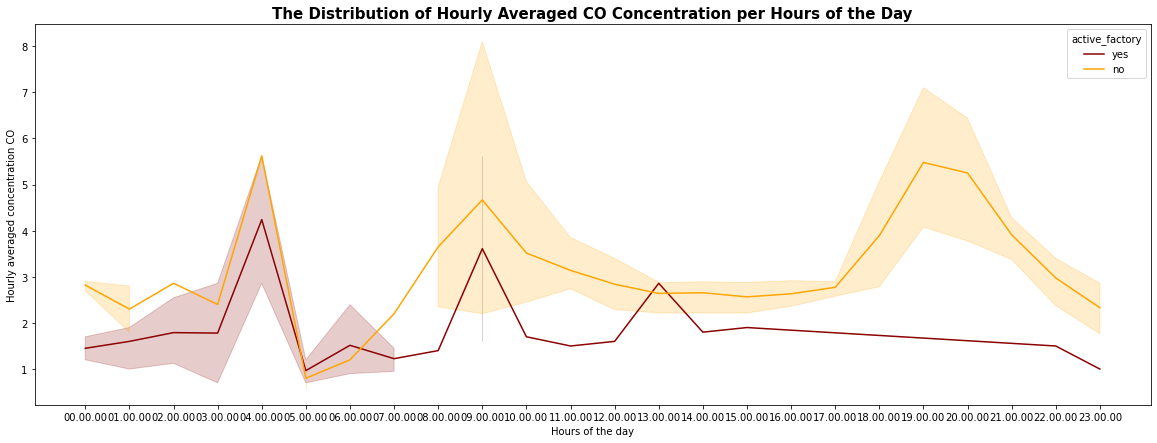

In [ ]:
plt.figure(figsize = (20,7)) #set the figure size
sns.lineplot(data=df, x="Time", y="CO.GT.", hue="active_factory", palette=['darkred','orange']) #x: the variable on the x axis, y: the variable on the y axis, #palette: assign a color palet
plt.xlabel('Hours of the day' ) #xlabel set axis title for x axis.
plt.ylabel('Hourly averaged concentration CO') #ylabel set axis title for y axis.
plt.title('The Distribution of Hourly Averaged CO Concentration per Hours of the Day',fontweight="bold",fontsize=15)  #set the title and font size. fontweight: bold makes your title bold.
plt.show()

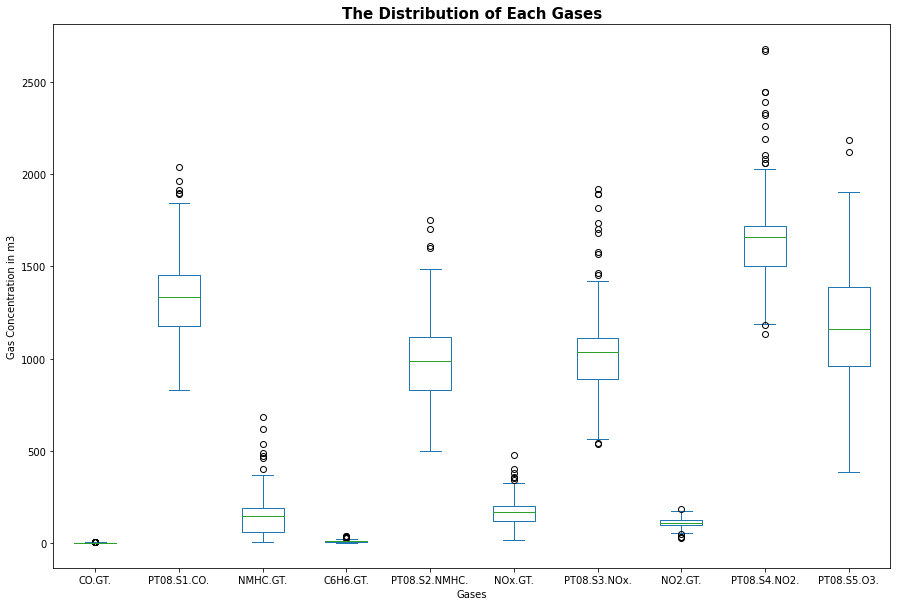

In [ ]:
gases= ['CO.GT.','PT08.S1.CO.', 'NMHC.GT.','C6H6.GT.','PT08.S2.NMHC.', 'NOx.GT.','PT08.S3.NOx.', 'NO2.GT.','PT08.S4.NO2.','PT08.S5.O3.'] #create a subset
df[gases].plot(kind = 'box',figsize=(15, 10)) #kind:the type of graph and figsize:the figure size 
plt.xlabel('Gases')  #xlabel set axis title for x axis.
plt.ylabel('Gas Concentration in m3') #ylabel set axis title for y axis.
plt.title('The Distribution of Each Gases',fontweight="bold",fontsize=15)  #set the title and font size. fontweight: bold makes your title bold.
plt.show()

Text(336.9714285714286, 0.5, 'C6H6 Concentration')

<Figure size 1080x1080 with 0 Axes>

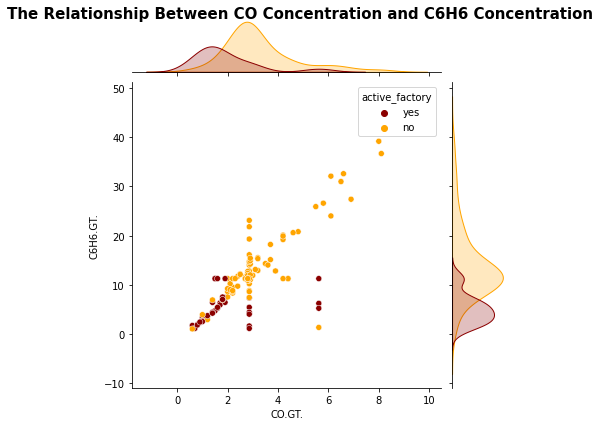

In [ ]:
plt.figure(figsize = (15,15)) # set the figure size
p=sns.jointplot(data=df, x="CO.GT.", y="C6H6.GT.",hue = 'active_factory', palette = ['darkred','orange'])#x: the variable on the x axis, y: the variable on the y axis, #palette: assign a color palet
p.fig.suptitle("The Relationship Between CO Concentration and C6H6 Concentration",fontweight="bold",fontsize=15)  #set the title and font size. fontweight: bold makes your title bold.
p.fig.subplots_adjust(top=0.95) #set title location
plt.xlabel('CO Concentration')  #xlabel set axis title for x axis.
plt.ylabel('C6H6 Concentration') #ylabel set axis title for y axis.

Text(0.5, 1.0, 'The Relationship Between CO Concentration and NOx Concentration')

<Figure size 1080x1080 with 0 Axes>

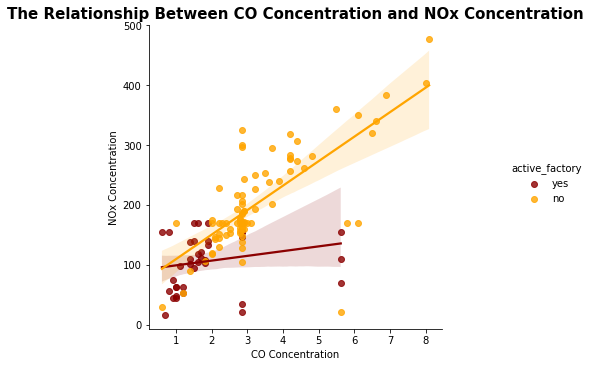

In [ ]:
plt.figure(figsize = (15,15)) #set the figure size
sns.lmplot(data=df, x="CO.GT.", y="NOx.GT.",hue = 'active_factory', palette = ['darkred','orange']) #x: the variable on the x axis, y: the variable on the y axis, #palette: assign a color palet
plt.xlabel('CO Concentration')  #xlabel set axis title for x axis.
plt.ylabel('NOx Concentration') #ylabel set axis title for y axis.
plt.title('The Relationship Between CO Concentration and NOx Concentration',fontweight="bold",fontsize=15)   #set the title and font size. fontweight: bold makes your title bold.

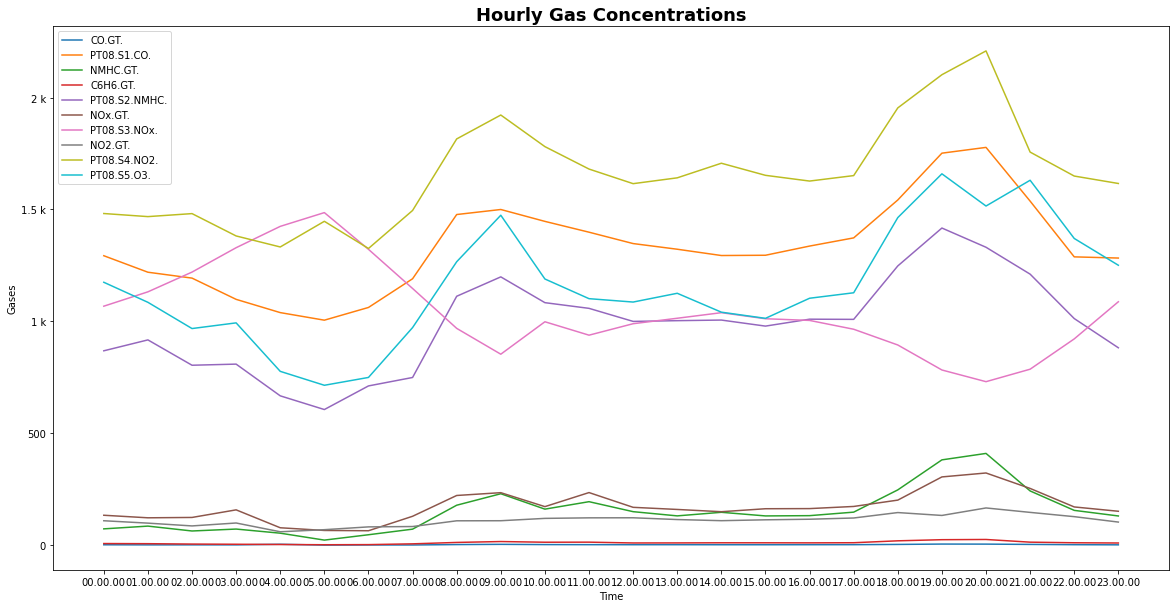

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10)) #set the figure size
ax.yaxis.set_major_formatter(ticker.EngFormatter())
for i in df.columns[2:12]:
    sns.lineplot(data = df, x = "Time", y = df[i], label = str(i), ci = None)
plt.title("Hourly Gas Concentrations", fontsize=18, fontweight="bold")  #set the title and font size. fontweight: bold makes your title bold.
plt.xlabel("Time") #xlabel set axis title for x axis.
plt.ylabel("Gases") #ylabel set axis title for y axis.
plt.show()

<ipython-input-9-8244aeb39a42>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df["sum"]=df.sum(axis=1)


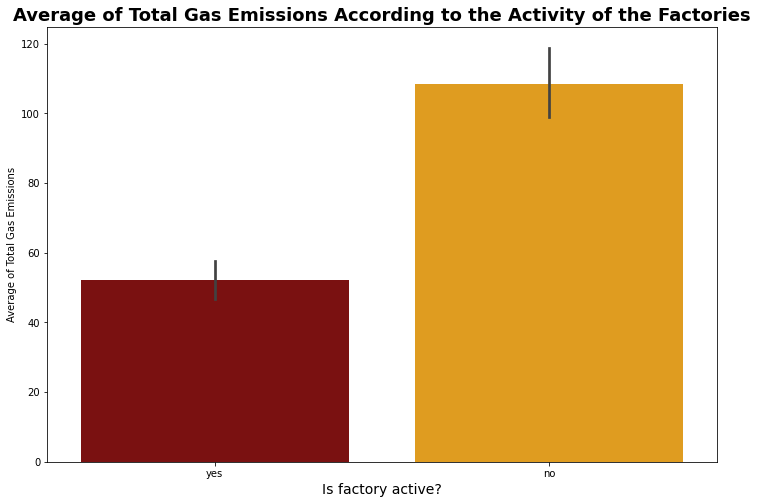

In [ ]:
#calculate the average total gas emissions
df["sum"]=df.sum(axis=1)
df["sum"]=df['C6H6.GT.']+df['CO.GT.']+df['NMHC.GT.']+df['NO2.GT.']+df['NOx.GT.']
df["sum"]=df["sum"]/5
plt.figure(figsize=(12, 8)) #figsize specifies the size of the figure object.
sns.barplot(x= 'active_factory', y="sum", data = df,palette = ['darkred','orange'])
plt.title("Average of Total Gas Emissions According to the Activity of the Factories",fontsize=18, fontweight="bold")  #set the title and font size. fontweight: bold makes your title bold.
plt.xlabel("Is factory active?", fontsize=14) #xlabel set axis title for x axis.
plt.ylabel("Average of Total Gas Emissions") #ylabel set axis title for y axis.
plt.show()